#KNN VECINOS MÁS CERCANOS

---

Para el análisis y creación del modelo KNN vecinos más cercanos, se ha utilizado un dataset obtenido GITHUB. (https://github.com/CodigoMaquina/code/blob/main/datos/creditos.csv), el que ha sido cargado a Google Colab.

OBJETIVO
El objetivo del proyecto, consiste en clasificar a clientes comprometidos con el pago de sus deudas en función de su edad. Estos se clasifican en buenos clientes y malos clientes.

VARIABLES
Las variables del dataset son 3, las que corresponden a:

*   EDAD: Edad del cliente que solicita crédito.
*   CRÉDITO: Monto total del crédito solicitado.
*   CUMPLIO: Indicador que muestra si la deuda fue pagada o no (1=SI, 0= NO).


In [1]:
# Se comienzan importando las librerias NUMPY y PANDAS para el tratamiendo de los datos.
import numpy as np
import pandas as pd
# Se importa MATPLOTLIB para la creación de los gráficos.
import matplotlib.pyplot as plt
# Se importa SKLEARN para el preprocesamiento de los datos y la elaboración del modelo KNN.
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Subimos el dataset a Google Colab y a través de la función READ_CSV la cargamos al notebook.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/créditos.csv')
df

,edad,credito,cumplio
0,18,363112,0
1,19,477965,1
2,20,239072,0
3,22,195265,0
4,22,482174,0
...,...,...,...
195,55,100000,0
196,55,523144,0
197,55,543771,0
198,56,285288,0


In [3]:
df.describe()

,edad,credito,cumplio
count,200.000000,200.000000,200.000000
mean,37.280000,289946.670000,0.835000
std,9.148776,137945.585277,0.372112
min,18.000000,100000.000000,0.000000
25%,29.000000,172966.500000,1.000000
50%,37.500000,276234.000000,1.000000
75%,45.000000,394574.500000,1.000000
max,57.000000,596771.000000,1.000000


La variable de edad tiene una media de 37 años, y el rango se encuentra en 18 a 57 años. El crédito promedio solicitado es de 289.946, siendo el menor crédito solicitado de 100.000 y el máximo de 596.771. 

In [4]:
df.info()
# El dataset contiene 3 columnas y 200 filas. No posee Missing Values, por lo que no requiere un tratamiento en esta ámbito.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   edad     200 non-null    int64
 1   credito  200 non-null    int64
 2   cumplio  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [5]:
# Realizamos una segmentación de clientes, agrupándolos en dos categorias: Buenos Clientes (que pagaron su crédito) y Malos Clientes (que no pagaron su crédito).
buen_cliente = df[df["cumplio"]==1]
mal_cliente = df[df["cumplio"]==0]

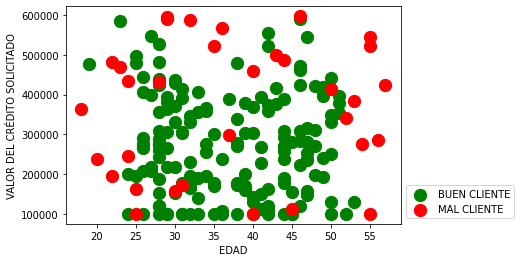

In [6]:
# Usando la libreria de MATPLOTLIB, se grafican ambos Dataframe para compararlos entre sí.
plt.scatter(buen_cliente["edad"], buen_cliente["credito"], marker="o", s=150, color="green", label="BUEN CLIENTE")

plt.scatter(mal_cliente["edad"], mal_cliente["credito"], marker="o", s=150, color="red", label="MAL CLIENTE")

plt.ylabel("VALOR DEL CRÉDITO SOLICITADO")
plt.xlabel("EDAD")
plt.legend(bbox_to_anchor=(1, 0.2)) 
plt.show()

Entre la edad de 20 a 25 años, se concentra una gran agrupación de puntos rojos correspondientes a clientes que no pagaron su deuda, esta situación se repite en la edad de 55 años aprox. Por otra parte, entre las edades de 26 a 50 años, las solicitudes de créditos bajo los 450.000 fueron ampliamente pagados.

### ESCALADO DE LOS DATOS

In [7]:
# Usando la función MINMAXSCALER, se escalan los datos para reducir su variabilidad, moviendose entre 0 y 1.
datos = df[["edad", "credito"]]
clase = df["cumplio"]

escalador = preprocessing.MinMaxScaler()
datos = escalador.fit_transform(datos)

### CREACIÓN DE MODELO KNN

---



In [8]:
# Se crea el modelo con N_NEIGHBORS de 3.
clasificador = KNeighborsClassifier(n_neighbors=3)
clasificador.fit(datos, clase)

KNeighborsClassifier(n_neighbors=3)

### PREDICIÓN DEL MODELO KNN

####  ANÁLISIS 1. 
Cliente de 55 años, solicita un crédito de 450.000. Se desea evaluar su según el modelo encontrado, es apropiado realizar el préstamo.

Clase: [0]
Probabilidades por clase [[0.66666667 0.33333333]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


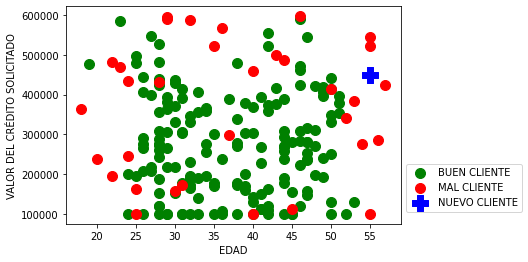

In [9]:
# Se realiza una predicción para un cliente que desea solicitar un crédito, el que es clasificado según el modelo.
edad = 55
monto = 450000

#Se debe escalar los datos del nuevo cliente para ser ingresado a la data ya escalada.
nuevo_cliente = escalador.transform([[edad, monto]])

#Calculo de clase (Paga o no paga), y su probabilidad de pertenecer a su clase.
print("Clase:", clasificador.predict(nuevo_cliente))
print("Probabilidades por clase",
      clasificador.predict_proba(nuevo_cliente))

#Se realiza un gráfico con la data escalada y los datos del nuevo solicitante.
plt.scatter(buen_cliente["edad"], buen_cliente["credito"],
            marker="o", s=100, color="green", label="BUEN CLIENTE")
plt.scatter(mal_cliente["edad"], mal_cliente["credito"],
            marker="o", s=100, color="red", label="MAL CLIENTE")
plt.scatter(edad, monto, marker="P", s=250, color="blue", label="NUEVO CLIENTE") 
plt.ylabel("VALOR DEL CRÉDITO SOLICITADO")
plt.xlabel("EDAD")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()

Considerando la ubicación de la etiqueta en el diagrama superior, dos de los vecinos más cercanos son malos clientes (cliente no pagador) y sólo uno es buen cliente (cliente pagador). Por lo tanto,la probabilidad de que no pague, está explicada en un 67% debido a su cercania con dos malos clientes. La probabilidad de que pague es de un 33%, explicado debido a su cercania con un vecino buen pagador. Finalmente, la clase asignada por el modelo es de 0, (no pagador), por lo que la unidad de negocio debe evaluar si el 33% encontrado es suficiente bajo sus politicas para el otorgamiento de crédito.

#### ANALISIS 2.
Cliente de 35 años, solicita un crédito de 250.000. Se desea evaluar su según el modelo encontrado, es apropiado realizar el préstamo.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


Clase: [1]
Probabilidades por clase [[0. 1.]]


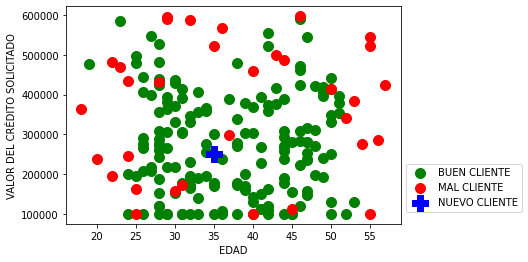

In [10]:
# Se realiza una predicción para un cliente que desea solicitar un crédito, el que es clasificado según el modelo.
edad = 35
monto = 250000

#Se debe escalar los datos del nuevo cliente para ser ingresado a la data ya escalada.
nuevo_cliente = escalador.transform([[edad, monto]])

#Calculo de clase (Paga o no paga), y su probabilidad de pertenecer a su clase.
print("Clase:", clasificador.predict(nuevo_cliente))
print("Probabilidades por clase",
      clasificador.predict_proba(nuevo_cliente))

#Se realiza un gráfico con la data escalada y los datos del nuevo solicitante.
plt.scatter(buen_cliente["edad"], buen_cliente["credito"],
            marker="o", s=100, color="green", label="BUEN CLIENTE")
plt.scatter(mal_cliente["edad"], mal_cliente["credito"],
            marker="o", s=100, color="red", label="MAL CLIENTE")
plt.scatter(edad, monto, marker="P", s=250, color="blue", label="NUEVO CLIENTE") 
plt.ylabel("VALOR DEL CRÉDITO SOLICITADO")
plt.xlabel("EDAD")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()

Considerando la ubicación de la etiqueta del diagrama superior, los tres vecinos cercanos utilizados para la evaluación son buenos pagadores. Su probabilidad de clase es de 100%, por lo tanto, es muy probable que si se le asigna un crédito a este cliente lo pagará. La clase indicada por el modelo corresponde a 1, por lo que se prevee sea un buen cliente.

### GRÁFICO SEGMENTADOR POR REGION

---

Se evaluan todas las posibles solicitudes que podrian realizar los clientes, para crear un gráfico que pueda resumir dichos comportamientos en un único diagrama.



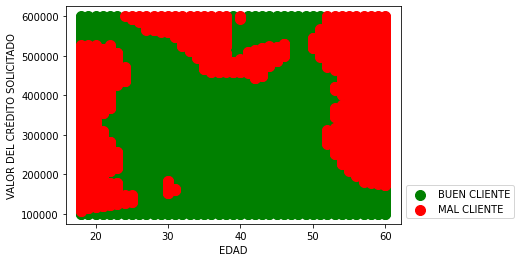

In [11]:
#Datos de todos los posibles solicitantes
creditos = np.array([np.arange(100000, 600010, 1000)]*43).reshape(1, -1)
edades = np.array([np.arange(18, 61)]*501).reshape(1, -1)
todos = pd.DataFrame(np.stack((edades, creditos), axis=2)[0],
                     columns=["edad", "credito"])

#Escalar los datos
nuevos_clientes = escalador.transform(todos)

#Predecir todas las clases
clases_resultantes = clasificador.predict(nuevos_clientes)

#Código para graficar
buen_cliente = todos[clases_resultantes==1]
mal_cliente = todos[clases_resultantes==0]
plt.scatter(buen_cliente['edad'], buen_cliente['credito'],
            marker='o', s=100, color="green", label="BUEN CLIENTE")
plt.scatter(mal_cliente["edad"], mal_cliente["credito"],
            marker='o', s=100, color="red", label="MAL CLIENTE")
plt.ylabel("VALOR DEL CRÉDITO SOLICITADO")
plt.xlabel("EDAD")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

CONCLUSIÓN
---

El modelo encontrado, es capaz de clasificar el comportamiento de clientes en función de su edad, en donde esta última variable resulta importante a la hora de evaluar el préstamo de un crédito bancario, representando un riesgo para el banco los clientes de 18 a 25 años que estén interesados en créditos de 100.000 a 550.000 aprox. Lo mismo ocurre con mayores de 50 años que deseen solicitar créditos sobre 180.000 aprox. La finalidad del modelo KNN es contribuir a reducir el nivel de incertidumbre que genera al banco el otorgamiento de créditos para distintos clientes, pudiendo mejorar la forma de evaluar a estos perfiles.
